# Name: Hinal Patel 
# CWID: 10473912

# Question 5: Use decision tree and random forest to train the titanic.csv dataset included in the assignment.

# Step 1:
Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
data = pd.read_csv('Titanic.csv')
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


VARIABLE DESCRIPTIONS:

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival: Outcomes of Survival (0 = No; 1 = Yes)

name: Name of passengers

sex: Sex of the passenger

Age: Age of the passenger (Some entries contain NaN)

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

Ticket: Ticket number of the passenger

fare: Passenger Fare (British pound)

Cabin: Cabin number of the passenger (Some entries contain NaN)

Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat: Lifeboat

Body: Body Identification Number

home.dest: Home/Destination

We are just taking pclass, sex, age, sibsp and survived columns. 

From the above dataset we can see that the class and sex of the passenger's are categorical,so we can change in the column pclass from 1st,2nd and 3rd to 1,2, and 3. Also change the sex column from Male and Female to the 0 and 1.

Some Passenger's age are missing so we are calculating as a mean of age in the column. And we are not changing Number of sibsp and survived column because it is in the form of 0 or 1.

In [3]:
#Preprocessing the data
data = data[['pclass','sex','age','sibsp','survived']]
data['pclass'] = data['pclass'].map({'1st':1,'2nd':2,'3rd':3})
data['sex'] = data['sex'].map({'male':0,'female':1})
data['age'].fillna((data['age'].mean()),inplace=True)
data.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [4]:
#Train the Model, 80% samples for training and the rest 20% for test.
x = data.drop('survived',axis=1) # independent variables
y = data['survived']     # dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1047, 4)
x_test shape: (262, 4)
y_train shape: (1047,)
y_test shape: (262,)


Now, we can see that if we split the data set, It is consider 1047 rows as training and 262 rows as testing.

# Step 2: 
Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different):


In [5]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier,export_graphviz  # import the classifier from sklearn

model = DecisionTreeClassifier()
fit = model.fit(x_train, y_train)


In [6]:
# Test the model
# Making the prediction
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Accuracy
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


The training accuracy is 0.89207258834766
The test accuracy is 0.7519083969465649


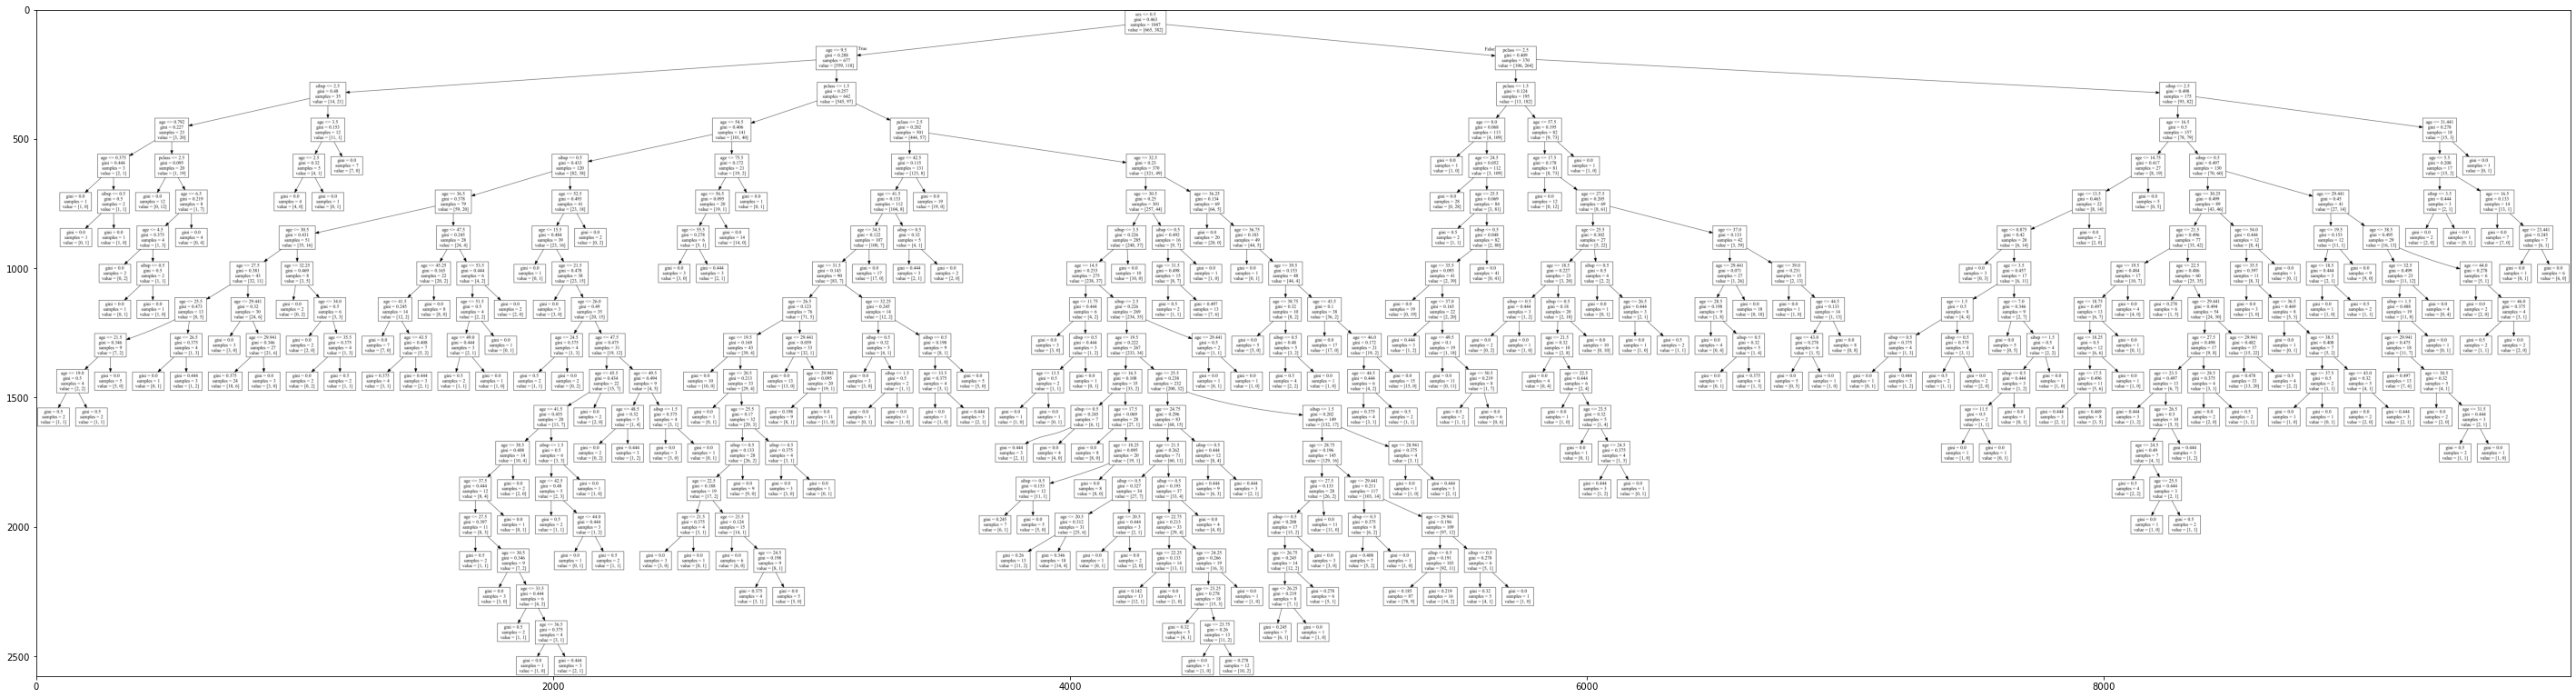

In [7]:
# plot the Decision Tree
import matplotlib.image as pltimg
import pydotplus
from sklearn import tree

fig = plt.figure(figsize=(50,40))
data = tree.export_graphviz(fit, out_file=None, feature_names= x_train.columns)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png("./decision_tree.png")

img = pltimg.imread("./decision_tree.png")
img_plot = plt.imshow(img)
plt.show()


# Step 3: 
Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.


In [8]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import f1_score

In [9]:
parameter = {'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11], 'max_depth':range(3,6)}

gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(random_state=None), param_grid = parameter, scoring='accuracy', cv=10, n_jobs=-1)
gridSearch.fit(x_train, y_train)
tree_model = gridSearch.best_estimator_

print("Accuracy: ",gridSearch.best_score_)
print("best parameter: ", gridSearch.best_params_)
print("best estimator: ", gridSearch.best_estimator_)



Accuracy:  0.8127655677655679
best parameter:  {'max_depth': 3, 'max_leaf_nodes': 5}
best estimator:  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)


max_leaf_nodes:  5


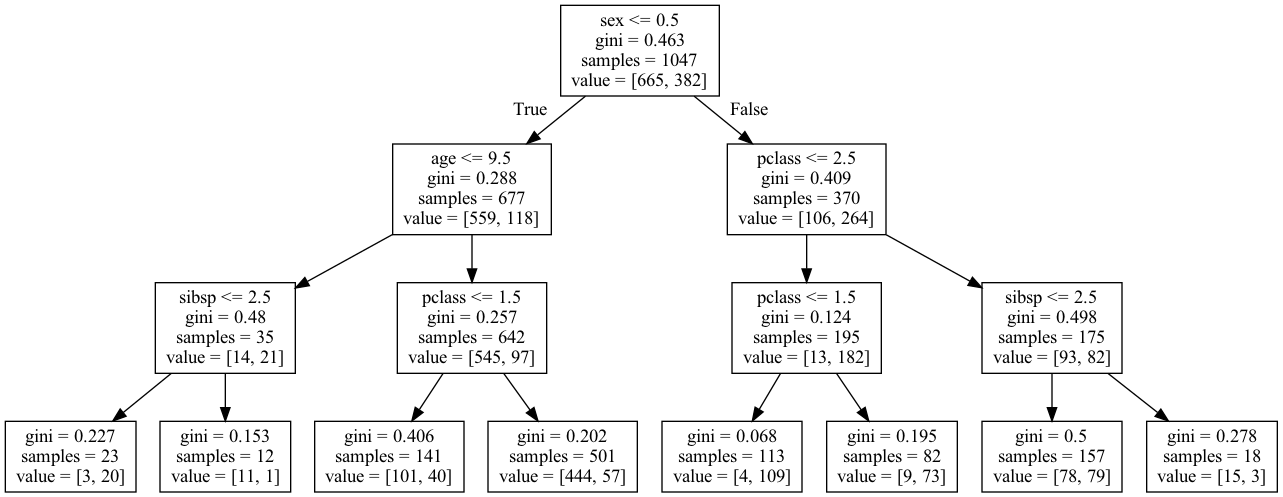

In [10]:
from IPython.display import Image

Classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10)
Classifier = Classifier.fit(x_train, y_train)

y_pred = Classifier.predict(x_test)

print("max_leaf_nodes: ",gridSearch.best_params_["max_leaf_nodes"] )


data = export_graphviz(Classifier, out_file=None,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [11]:
means = gridSearch.cv_results_['mean_test_score']
stds = gridSearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
print("\nDetailed classification report:\n")
y_true, y_pred = y_test, gridSearch.predict(x_test)
print(classification_report(y_true, y_pred))
print()


0.786 (+/-0.092) for {'max_depth': 3, 'max_leaf_nodes': 2}
0.797 (+/-0.033) for {'max_depth': 3, 'max_leaf_nodes': 3}
0.803 (+/-0.029) for {'max_depth': 3, 'max_leaf_nodes': 4}
0.813 (+/-0.028) for {'max_depth': 3, 'max_leaf_nodes': 5}
0.813 (+/-0.028) for {'max_depth': 3, 'max_leaf_nodes': 6}
0.793 (+/-0.056) for {'max_depth': 3, 'max_leaf_nodes': 7}
0.792 (+/-0.058) for {'max_depth': 3, 'max_leaf_nodes': 8}
0.792 (+/-0.058) for {'max_depth': 3, 'max_leaf_nodes': 9}
0.792 (+/-0.058) for {'max_depth': 3, 'max_leaf_nodes': 10}
0.792 (+/-0.058) for {'max_depth': 3, 'max_leaf_nodes': 11}
0.786 (+/-0.092) for {'max_depth': 4, 'max_leaf_nodes': 2}
0.797 (+/-0.033) for {'max_depth': 4, 'max_leaf_nodes': 3}
0.803 (+/-0.029) for {'max_depth': 4, 'max_leaf_nodes': 4}
0.813 (+/-0.028) for {'max_depth': 4, 'max_leaf_nodes': 5}
0.813 (+/-0.028) for {'max_depth': 4, 'max_leaf_nodes': 6}
0.792 (+/-0.053) for {'max_depth': 4, 'max_leaf_nodes': 7}
0.792 (+/-0.056) for {'max_depth': 4, 'max_leaf_nodes'

# Step 4: 
For the pruned tree, report its accuracy on the test set for the following:

percent survivors correctly predicted (on test set)

percent fatalities correctly predicted (on test set)

In [12]:
#for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)
TN = conf_matrix_test[0][0]
FN = conf_matrix_test[1][0]
TP = conf_matrix_test[1][1]
FP = conf_matrix_test[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("Confusion Matrix for testing is:\n", conf_matrix_test)
print("percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(specificity_test*100))
print('Accuracy for Decision tree Classifier is: {0:.2f}%\n '. format(((TP+TN)/(TN+TP+FP+FN)*100)))


Confusion Matrix for testing is:
 [[140   4]
 [ 63  55]]
percent survivors correctly predicted (on test set) : 46.61%

percent fatalities correctly predicted (on test set) : 97.22%

Accuracy for Decision tree Classifier is: 74.43%
 


# Step 5:
Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:

percent survivors correctly predicted (on test set)

percent fatalities correctly predicted (on test set)

Check whether there is improvement as compared to a single tree obtained in Step 4.

In [20]:
# RF Classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_leaf_nodes=5, n_estimators=50)
RF_fit = RF_model.fit(x_train, y_train)

#Make the prediction 
y_train_prediction = RF_model.predict(x_train)
y_test_prediction = RF_model.predict(x_test)

#Accuracy

training_accuracy = accuracy_score(y_train, y_train_prediction)
testing_accuracy = accuracy_score(y_test, y_test_prediction)
print('The training accuracy for RF is', training_accuracy)
print('The test accuracy for RF is', testing_accuracy)


The training accuracy for RF is 0.8147086914995224
The test accuracy for RF is 0.7442748091603053


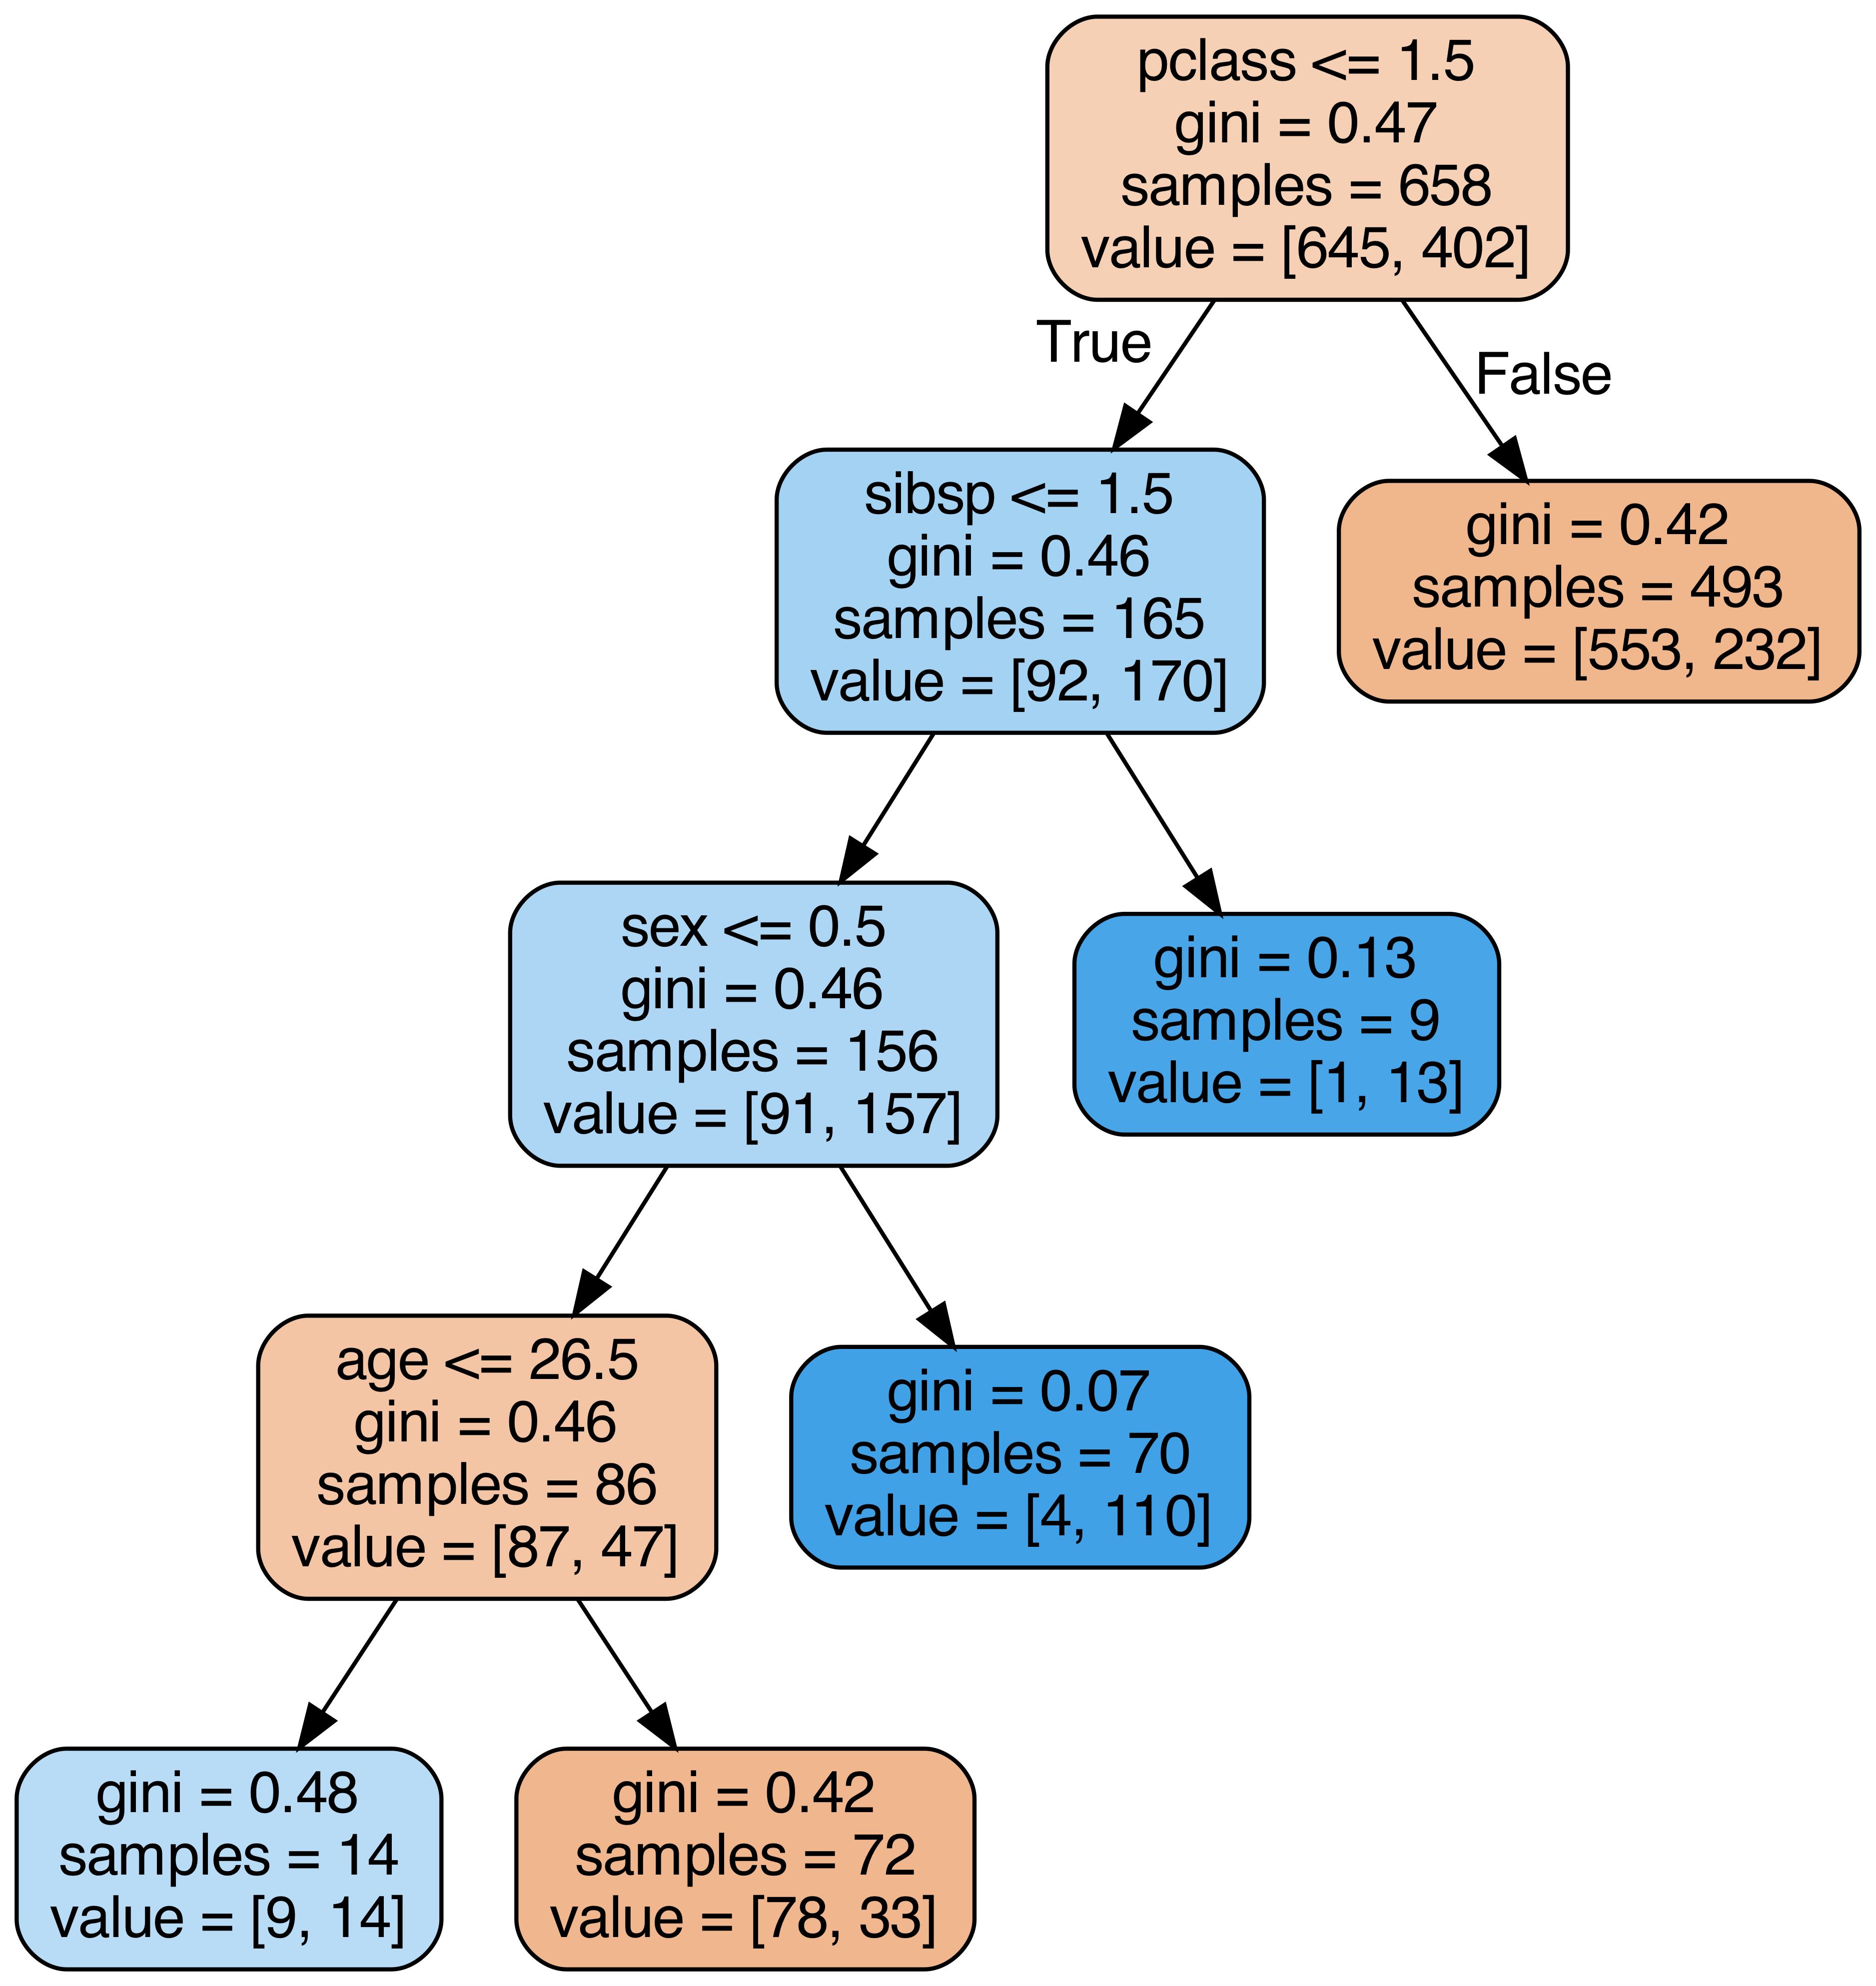

In [21]:
# Export as dot file
estimator = RF_model.estimators_[5]
export_graphviz(estimator, 
                out_file='RF_tree.dot', 
                feature_names = x_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call


call(['dot', '-Tpng', 'RF_tree.dot', '-o', 'RF_tree.png', '-Gdpi=600'])
Image(filename = 'RF_tree.png')

In [23]:
#for testing set
conf_matrix = confusion_matrix(y_test, y_test_prediction)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("Confusion Matrix for testing is:\n", conf_matrix)
print("percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(specificity_test*100))
print('Accuracy for RF Classifier is : {0:.2f}%\n '. format(((TP+TN)/(TN+TP+FP+FN)*100)))

print("\nClassification report: \n\n",classification_report(y_test, RF_fit.predict(x_test)))

Confusion Matrix for testing is:
 [[127  17]
 [ 50  68]]
percent survivors correctly predicted (on test set) : 57.63%

percent fatalities correctly predicted (on test set) : 88.19%

Accuracy for RF Classifier is : 74.43%
 

Classification report: 

               precision    recall  f1-score   support

           0       0.72      0.88      0.79       144
           1       0.80      0.58      0.67       118

    accuracy                           0.74       262
   macro avg       0.76      0.73      0.73       262
weighted avg       0.75      0.74      0.74       262



From the above result we can Conclude that the accuracy for the Decision tree is 74.43% and 75.19% for RF, so we can see that, there is some percentage of improvement in RF classifiers.

In decision tree, percent survivors correctly predicted (on test set) and percent fatalities correctly predicted (on test set) is 46.61% and 97.22%.

In RF, percent survivors correctly predicted (on test set) and percent fatalities correctly predicted (on test set) is 53.76% and 93.06%.

from the above result we can see improvement in RF classifier.